In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid", palette="bright")
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import RobustScaler
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/AirQualityUCI.csv", sep=';')

In [ ]:
#df = pd.read_csv("C:/Users/user/Desktop/homework/hw2/AirQualityUCI.csv", sep=';')

# DP

In [ ]:
df.describe(include="all").T

count unique         top  freq         mean         std  \
Date             9357    391  21/09/2004    24          NaN         NaN   
Time             9357     24    18.00.00   390          NaN         NaN   
CO(GT)           9357    104        -200  1592          NaN         NaN   
PT08.S1(CO)    9357.0    NaN         NaN   NaN  1048.990061   329.83271   
NMHC(GT)       9357.0    NaN         NaN   NaN  -159.090093  139.789093   
C6H6(GT)         9357    408      -200,0   366          NaN         NaN   
PT08.S2(NMHC)  9357.0    NaN         NaN   NaN   894.595276  342.333252   
NOx(GT)        9357.0    NaN         NaN   NaN   168.616971  257.433866   
PT08.S3(NOx)   9357.0    NaN         NaN   NaN   794.990168  321.993552   
NO2(GT)        9357.0    NaN         NaN   NaN    58.148873  126.940455   
PT08.S4(NO2)   9357.0    NaN         NaN   NaN  1391.479641  467.210125   
PT08.S5(O3)    9357.0    NaN         NaN   NaN   975.072032  456.938184   
T                9357    437        -200   366          NaN         NaN   
RH               9357    754        -200   366          NaN         NaN   
AH               9357   6684        -200   366          NaN         NaN   
Unnamed: 15       0.0    NaN         NaN   NaN          NaN         NaN   
Unnamed: 16       0.0    NaN         NaN   NaN          NaN         NaN   

                 min     25%     50%     75%     max  
Date             NaN     NaN     NaN     NaN     NaN  
Time             NaN     NaN     NaN     NaN     NaN  
CO(GT)           NaN     NaN     NaN     NaN     NaN  
PT08.S1(CO)   -200.0   921.0  1053.0  1221.0  2040.0  
NMHC(GT)      -200.0  -200.0  -200.0  -200.0  1189.0  
C6H6(GT)         NaN     NaN     NaN     NaN     NaN  
PT08.S2(NMHC) -200.0   711.0   895.0  1105.0  2214.0  
NOx(GT)       -200.0    50.0   141.0   284.0  1479.0  
PT08.S3(NOx)  -200.0   637.0   794.0   960.0  2683.0  
NO2(GT)       -200.0    53.0    96.0   133.0   340.0  
PT08.S4(NO2)  -200.0  1185.0  1446.0  1662.0  2775.0  
PT08.S5(O3)   -200.0   700.0   942.0  1255.0  2523.0  
T                NaN     NaN     NaN     NaN     NaN  
RH               NaN     NaN     NaN     NaN     NaN  
AH               NaN     NaN     NaN     NaN     NaN  
Unnamed: 15      NaN     NaN     NaN     NaN     NaN  
Unnamed: 16      NaN     NaN     NaN     NaN     NaN

In [ ]:
df=df.drop(['Unnamed: 15'], axis=1)
df=df.drop(['Unnamed: 16'], axis=1)

As we can see, some columns are not seen as numbers. So we'll fix that

In [ ]:
numeric_columns = ['CO(GT)', 'PT08.S1(CO)', 'NMHC(GT)', 'C6H6(GT)',
                   'PT08.S2(NMHC)', 'NOx(GT)', 'PT08.S3(NOx)', 'NO2(GT)',
                   'PT08.S4(NO2)', 'PT08.S5(O3)', 'T', 'RH', 'AH']
#Making data numeric
df[numeric_columns] = df[numeric_columns].replace(',', '.', regex=True).astype(float)
df.replace(-200, np.nan, inplace=True)
#dropping rows where C6H6(GT)=np.nan
df = df[df['C6H6(GT)'].notna()]

further we replace all values -200 by np.nan and remove the rows in the table where the value C6H6(GT)=np.nan, because it makes no sense to fill in the target value.

In [ ]:
df['Date'] = pd.to_datetime(df['Date'], format='%d/%m/%Y')

# Extracting Weekday and Month into separate columns
df['Weekday'] = df['Date'].dt.dayofweek  # Monday=0, Sunday=6
df['Month'] = df['Date'].dt.month


df['Time'] = pd.to_datetime(df['Time'], format='%H.%M.%S', errors='coerce')

# Extracting hours, minutes, and seconds
df['hour'] = df['Time'].dt.hour
df['minute'] = df['Time'].dt.minute
df['second'] = df['Time'].dt.second

# Combining hours, minutes, and seconds into a decimal representation
df['Time_numeric'] = df['hour'] + df['minute'] / 60 + df['second'] / 3600

<ipython-input-72-b1f7dc51c0e3>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Date'] = pd.to_datetime(df['Date'], format='%d/%m/%Y')
<ipython-input-72-b1f7dc51c0e3>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Weekday'] = df['Date'].dt.dayofweek  # Monday=0, Sunday=6
<ipython-input-72-b1f7dc51c0e3>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https:/

In [ ]:
df.describe(include="all").T


<ipython-input-73-82db955af124>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  df.describe(include="all").T
<ipython-input-73-82db955af124>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  df.describe(include="all").T


count unique                 top freq      first  \
Date             8991    383 2004-09-19 00:00:00   24 2004-03-10   
Time             8991     24 1900-01-01 09:00:00  378 1900-01-01   
CO(GT)         7344.0    NaN                 NaT  NaN        NaT   
PT08.S1(CO)    8991.0    NaN                 NaT  NaN        NaT   
NMHC(GT)        887.0    NaN                 NaT  NaN        NaT   
C6H6(GT)       8991.0    NaN                 NaT  NaN        NaT   
PT08.S2(NMHC)  8991.0    NaN                 NaT  NaN        NaT   
NOx(GT)        7396.0    NaN                 NaT  NaN        NaT   
PT08.S3(NOx)   8991.0    NaN                 NaT  NaN        NaT   
NO2(GT)        7393.0    NaN                 NaT  NaN        NaT   
PT08.S4(NO2)   8991.0    NaN                 NaT  NaN        NaT   
PT08.S5(O3)    8991.0    NaN                 NaT  NaN        NaT   
T              8991.0    NaN                 NaT  NaN        NaT   
RH             8991.0    NaN                 NaT  NaN        NaT   
AH             8991.0    NaN                 NaT  NaN        NaT   
Weekday        8991.0    NaN                 NaT  NaN        NaT   
Month          8991.0    NaN                 NaT  NaN        NaT   
hour           8991.0    NaN                 NaT  NaN        NaT   
minute         8991.0    NaN                 NaT  NaN        NaT   
second         8991.0    NaN                 NaT  NaN        NaT   
Time_numeric   8991.0    NaN                 NaT  NaN        NaT   

                             last         mean         std     min     25%  \
Date          2005-04-04 00:00:00          NaN         NaN     NaN     NaN   
Time          1900-01-01 23:00:00          NaN         NaN     NaN     NaN   
CO(GT)                        NaT     2.129711    1.436472     0.1     1.1   
PT08.S1(CO)                   NaT  1099.833166  217.080037   647.0   937.0   
NMHC(GT)                      NaT   218.607666   206.61513     7.0    66.0   
C6H6(GT)                      NaT    10.083105     7.44982     0.1     4.4   
PT08.S2(NMHC)                 NaT   939.153376  266.831429   383.0   734.5   
NOx(GT)                       NaT   242.189292  206.312007     2.0    97.0   
PT08.S3(NOx)                  NaT   835.493605   256.81732   322.0   658.0   
NO2(GT)                       NaT   112.145137   47.629141     2.0    77.0   
PT08.S4(NO2)                  NaT  1456.264598  346.206794   551.0  1227.0   
PT08.S5(O3)                   NaT  1022.906128  398.484288   221.0   731.5   
T                             NaT    18.317829    8.832116    -1.9    11.8   
RH                            NaT    49.234201   17.316892     9.2    35.8   
AH                            NaT      1.02553    0.403813  0.1847  0.7368   
Weekday                       NaT     3.015237    2.014599     0.0     1.0   
Month                         NaT     6.327772    3.407854     1.0     3.0   
hour                          NaT    11.479591     6.91332     0.0     5.0   
minute                        NaT          0.0         0.0     0.0     0.0   
second                        NaT          0.0         0.0     0.0     0.0   
Time_numeric                  NaT    11.479591     6.91332     0.0     5.0   

                  50%     75%     max  
Date              NaN     NaN     NaN  
Time              NaN     NaN     NaN  
CO(GT)            1.8     2.8    11.9  
PT08.S1(CO)    1063.0  1231.0  2040.0  
NMHC(GT)        145.0   297.0  1189.0  
C6H6(GT)          8.2    14.0    63.7  
PT08.S2(NMHC)   909.0  1116.0  2214.0  
NOx(GT)         178.0   321.0  1479.0  
PT08.S3(NOx)    806.0   969.5  2683.0  
NO2(GT)         109.0   140.0   333.0  
PT08.S4(NO2)   1463.0  1674.0  2775.0  
PT08.S5(O3)     963.0  1273.5  2523.0  
T                17.8    24.4    44.6  
RH               49.6    62.5    88.7  
AH             0.9954  1.3137   2.231  
Weekday           3.0     5.0     6.0  
Month             6.0     9.0    12.0  
hour             11.0    17.0    23.0  
minute            0.0     0.0     0.0  
se

Now we have prepared data to analyze.
From the date column we extracted the month and day, from the time column we extracted the hours, minutes and seconds to calculate the total time. These auxiliary columns can be deleted as well as the date column.

In [ ]:
df=df.drop(['Date'], axis=1)
df=df.drop(['Time'], axis=1)
df=df.drop(['hour'], axis=1)
df=df.drop(['minute'], axis=1)
df=df.drop(['second'], axis=1)

# EDA

This is a function to display a graph of the distribution

In [ ]:
def plot_distribution(df, col, xl, yl, tit, legend_label=None):
    sns.displot(df[col], kind="kde",label=legend_label)
    plt.xlabel(xl)
    plt.ylabel(yl)
    plt.title(tit)
    plt.legend()
    plt.show()

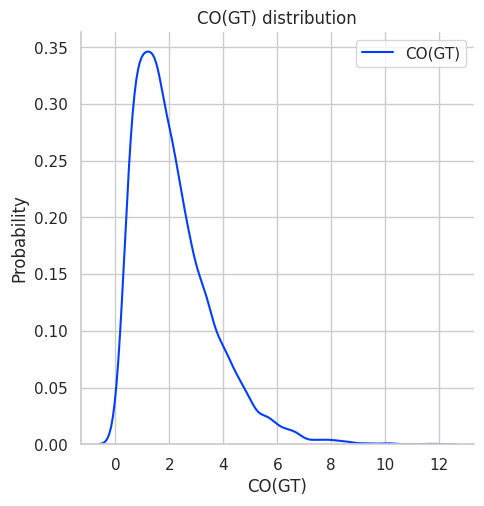

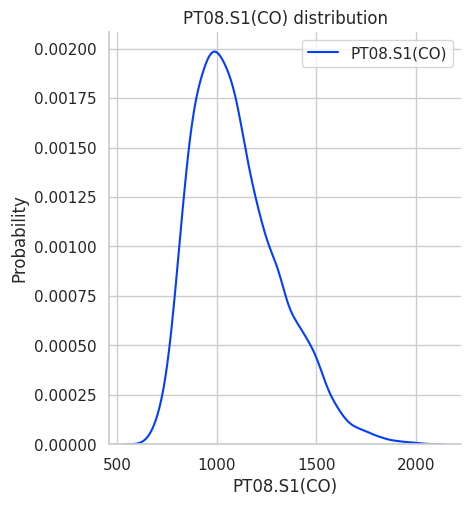

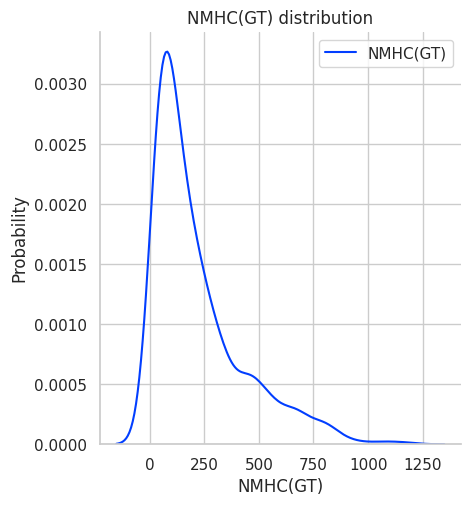

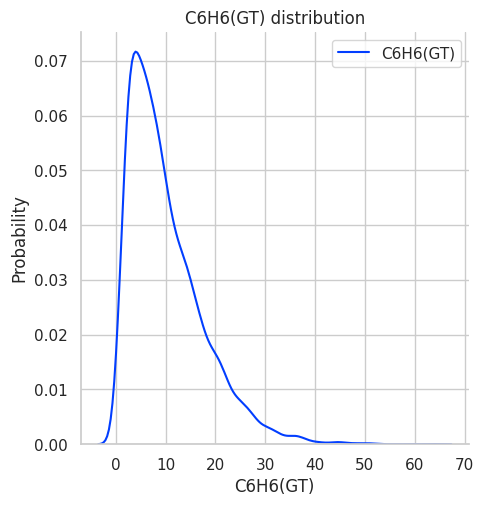

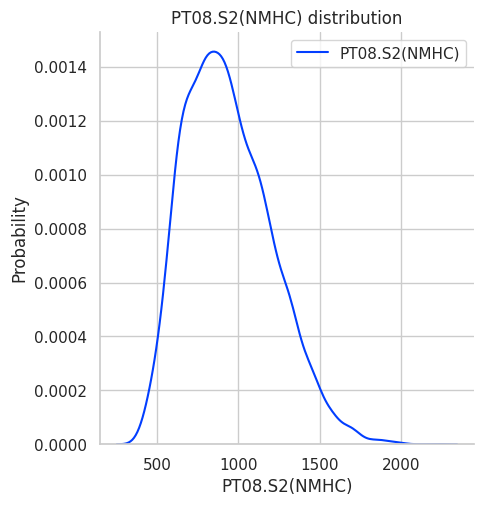

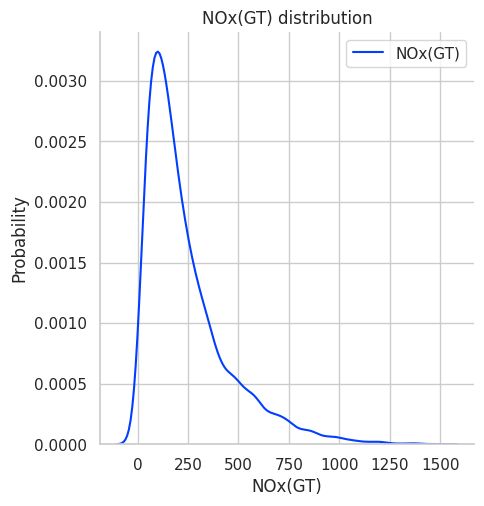

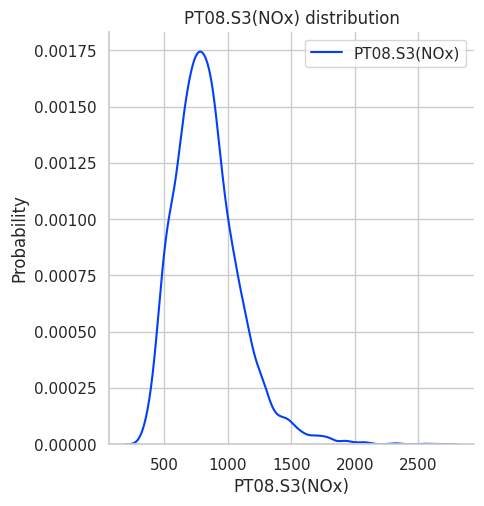

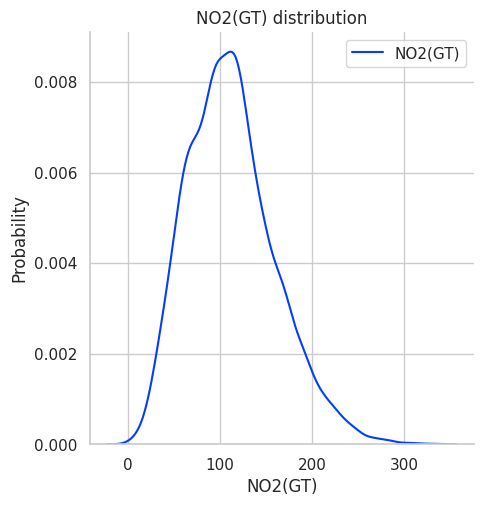

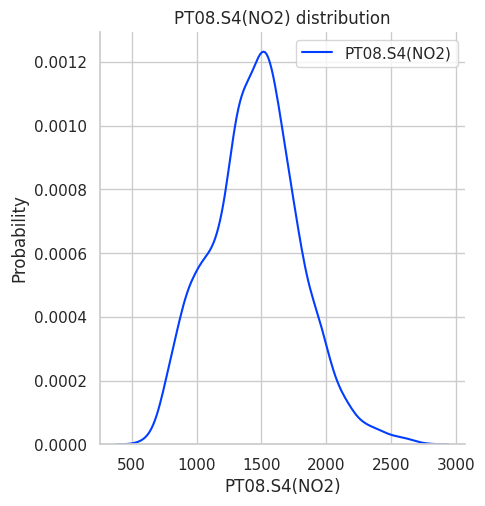

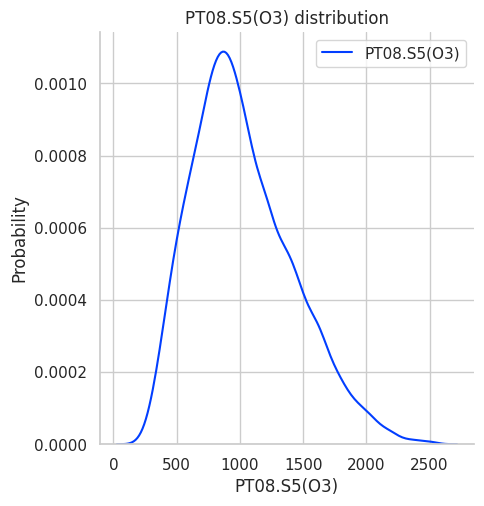

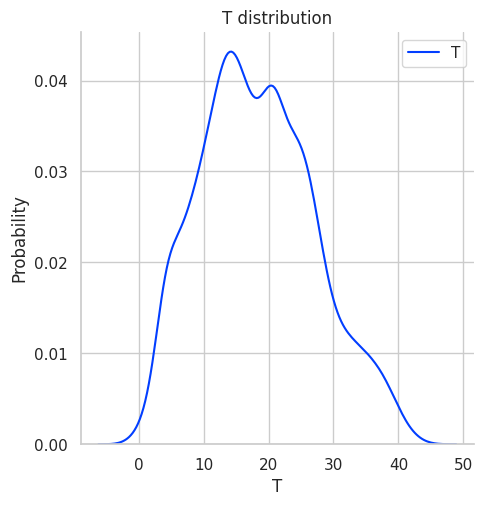

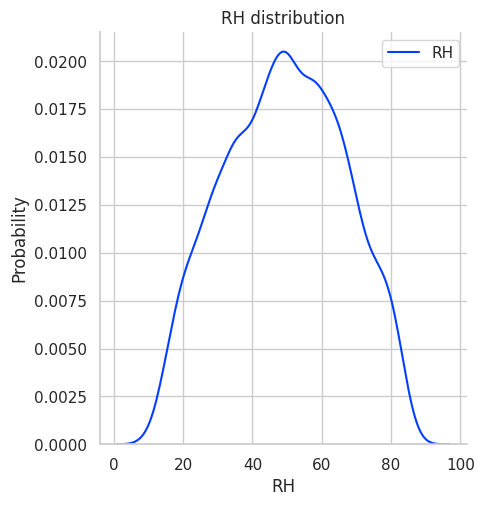

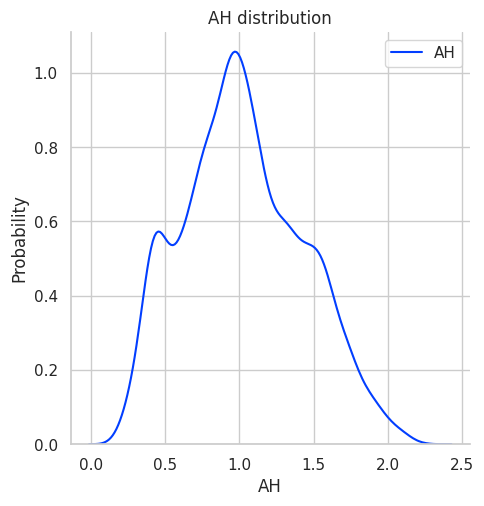

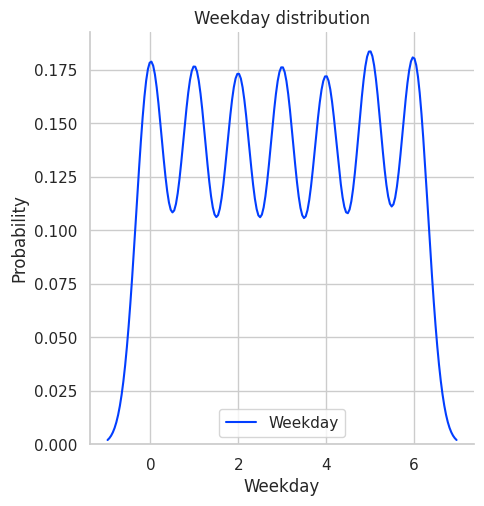

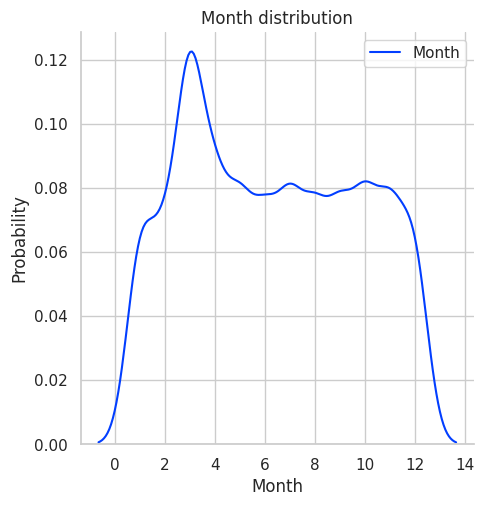

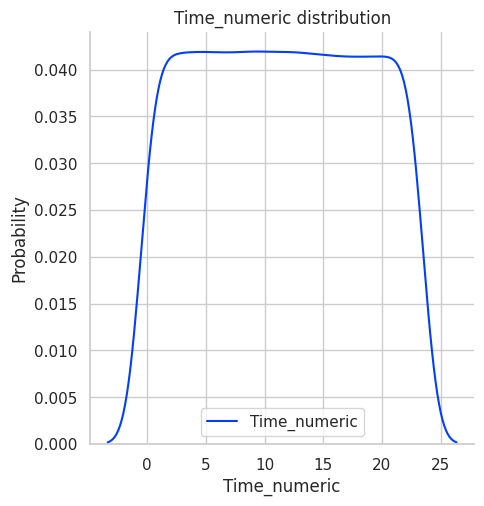

In [ ]:
for col in df.columns:
    plot_distribution(df, col, col, 'Probability', col+' distribution', legend_label=col)

After viewing these graphs, we can conclude that in some columns there are extreme values, because of which the graphs are skewed to the left
most of the data have a distribution close to normal. And the data that represent time have a distribution close to a uniform distribution

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8991 entries, 0 to 9356
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   CO(GT)         7344 non-null   float64
 1   PT08.S1(CO)    8991 non-null   float64
 2   NMHC(GT)       887 non-null    float64
 3   C6H6(GT)       8991 non-null   float64
 4   PT08.S2(NMHC)  8991 non-null   float64
 5   NOx(GT)        7396 non-null   float64
 6   PT08.S3(NOx)   8991 non-null   float64
 7   NO2(GT)        7393 non-null   float64
 8   PT08.S4(NO2)   8991 non-null   float64
 9   PT08.S5(O3)    8991 non-null   float64
 10  T              8991 non-null   float64
 11  RH             8991 non-null   float64
 12  AH             8991 non-null   float64
 13  Weekday        8991 non-null   int64  
 14  Month          8991 non-null   int64  
 15  Time_numeric   8991 non-null   float64
dtypes: float64(14), int64(2)
memory usage: 1.2 MB


In [ ]:
columns_to_impute = ['CO(GT)', 'PT08.S1(CO)', 'NMHC(GT)', 'C6H6(GT)',
                      'PT08.S2(NMHC)', 'NOx(GT)', 'PT08.S3(NOx)', 'NO2(GT)',
                      'PT08.S4(NO2)', 'PT08.S5(O3)', 'T', 'RH', 'AH', 'Weekday', 'Month', 'Time_numeric']

'''numeric_columns = ['CO(GT)', 'PT08.S1(CO)', 'NMHC(GT)', 'C6H6(GT)',
                   'PT08.S2(NMHC)', 'NOx(GT)', 'PT08.S3(NOx)', 'NO2(GT)',
                   'PT08.S4(NO2)', 'PT08.S5(O3)', 'T', 'RH', 'AH']'''

#df[numeric_columns] = df[numeric_columns].replace(',', '.', regex=True).astype(float)


# Imputer strategies
strategies = {'CO(GT)': 'mean',
              'PT08.S1(CO)': 'median',
              'NMHC(GT)': 'median',
              'C6H6(GT)': 'most_frequent',
              'PT08.S2(NMHC)': 'median',
              'NOx(GT)': 'median',
              'PT08.S3(NOx)': 'median',
              'NO2(GT)': 'mean',
              'PT08.S4(NO2)': 'mean',
              'PT08.S5(O3)': 'mean',
              'T': 'mean',
              'RH': 'mean',
              'AH': 'mean',
              'Weekday':'most_frequent',
              'Month':'most_frequent',
              'Time_numeric':'mean' }

# Impute missing values
for column in columns_to_impute:
    imputer = SimpleImputer(strategy=strategies[column])
    df[column] = imputer.fit_transform(df[[column]]).ravel()



I filled messing values using this ideas

Mean Imputation:
Suitable for numerical data with a normal distribution and when missing values are random.

Median Imputation:
Robust to outliers, suitable for non-normally distributed numerical data or ordinal data.

Most Frequent Imputation:
Appropriate for categorical or discrete data when missing values are random.

In [ ]:
'''df['NMHC(GT)'] = np.where(df['NMHC(GT)'] > 600,600, df['NMHC(GT)'])
df['NOx(GT)'] = np.where(df['NOx(GT)'] > 1000, 1000, df['NOx(GT)'])
df['PT08.S3(NOx)'] = np.where(df['PT08.S3(NOx)'] > 1700, 1700, df['PT08.S3(NOx)'])'''

"df['NMHC(GT)'] = np.where(df['NMHC(GT)'] > 600,600, df['NMHC(GT)'])\ndf['NOx(GT)'] = np.where(df['NOx(GT)'] > 1000, 1000, df['NOx(GT)'])\ndf['PT08.S3(NOx)'] = np.where(df['PT08.S3(NOx)'] > 1700, 1700, df['PT08.S3(NOx)'])"

Below is the function to plot the box plot

In [ ]:
def plot_boxplot(df, x_col, y_col='C6H6(GT)'):
    plt.figure(figsize=(12, 6))
    sns.boxplot(x=df[x_col], y=df[y_col])
    plt.title(f'Boxplot of {y_col} by {x_col}')
    plt.show()

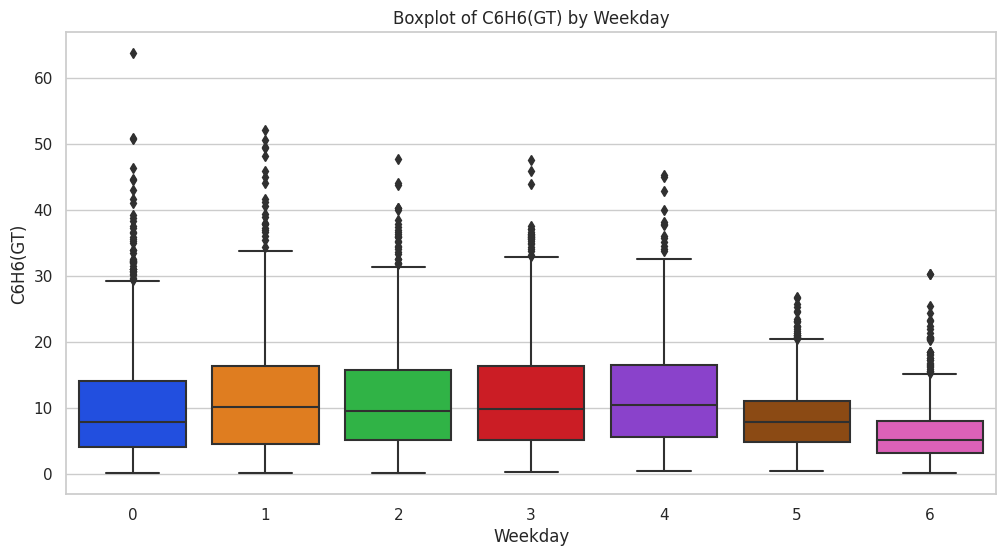

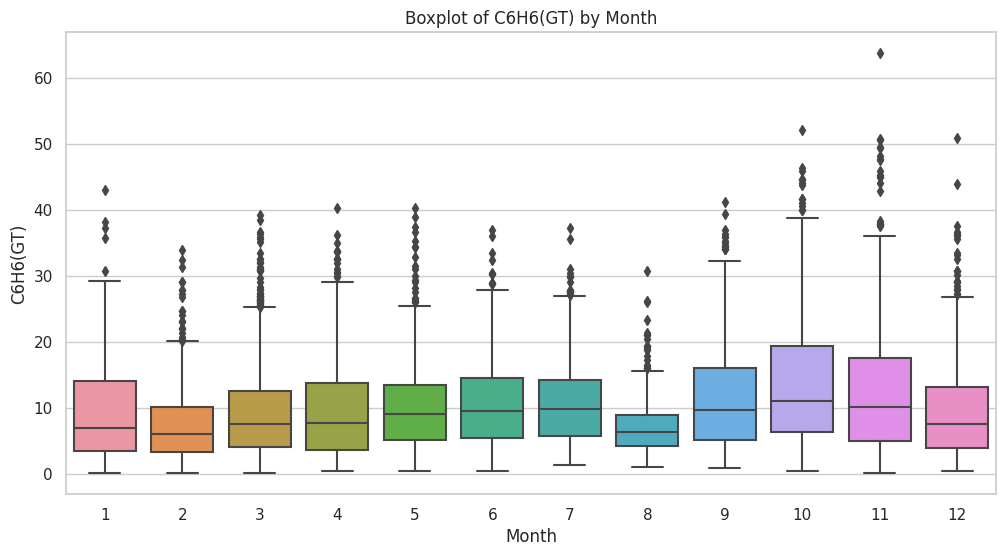

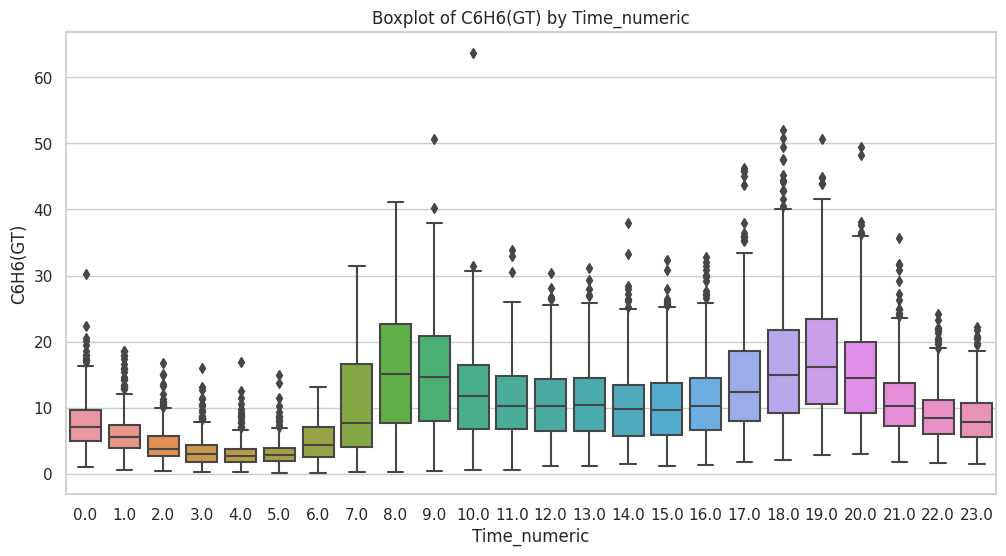

In [ ]:
columns = ['Weekday','Month', 'Time_numeric']

for column in columns:
    plot_boxplot(df, x_col=column)

As can be seen in the graphs, C6H6 levels fluctuate slightly during the week. The situation is the same for months. Most fluctuations occur during the day.It reaches its highest value between 7-9 and 18-20 hours. This is probably related to people traveling to and from work. The graph with changes during the week also suggests this idea: the level is high on weekdays and low on Saturdays and Sundays

In [ ]:
def plot_scatterplot(df, x_col, y_col='C6H6(GT)'):
    plt.figure(figsize=(12, 6))
    sns.scatterplot(x=df[x_col], y=df[y_col])
    plt.title(f'Scatterplot of {y_col} against {x_col}')
    plt.show()

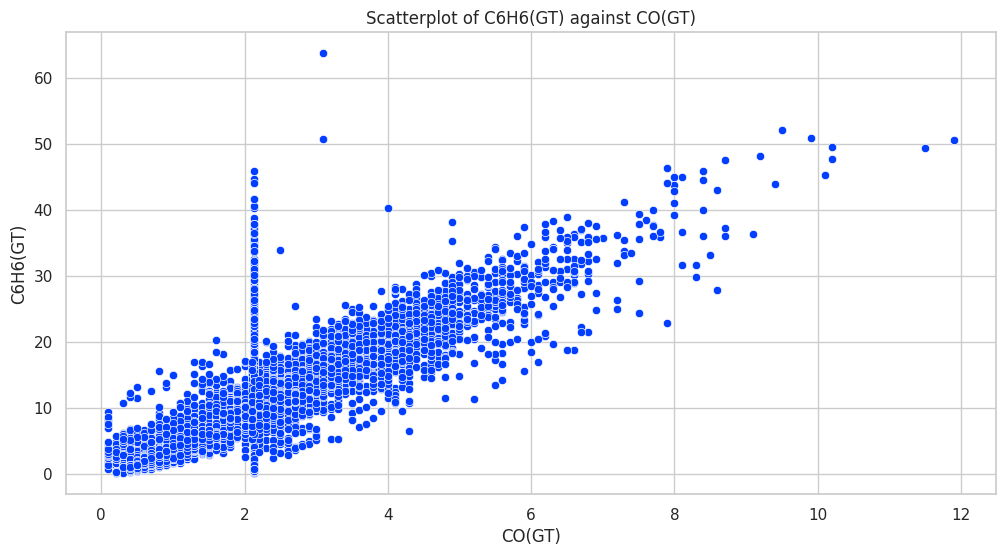

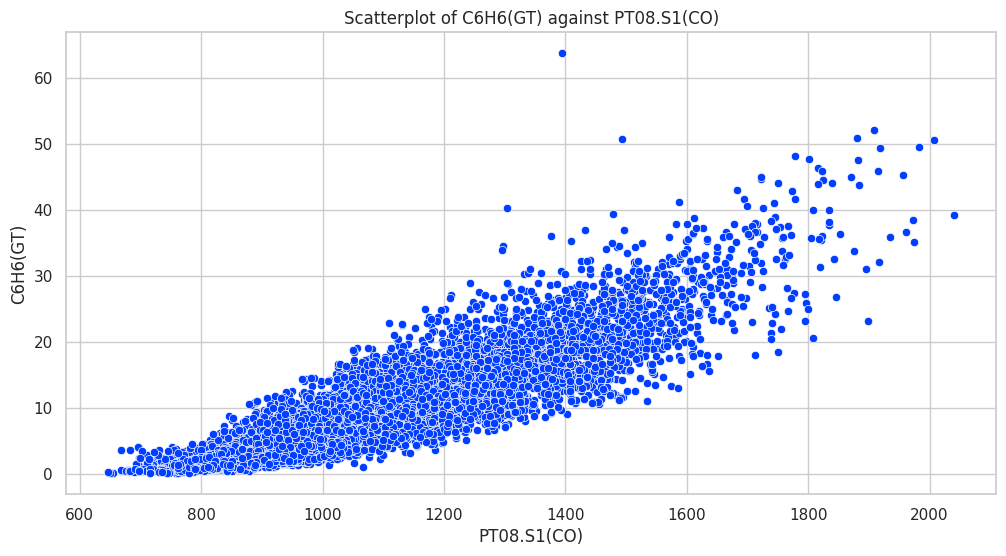

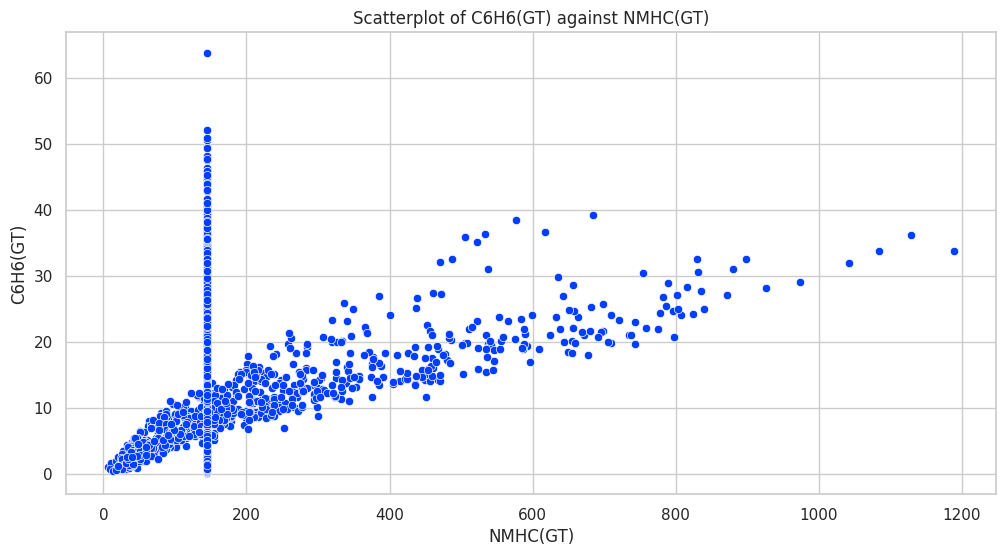

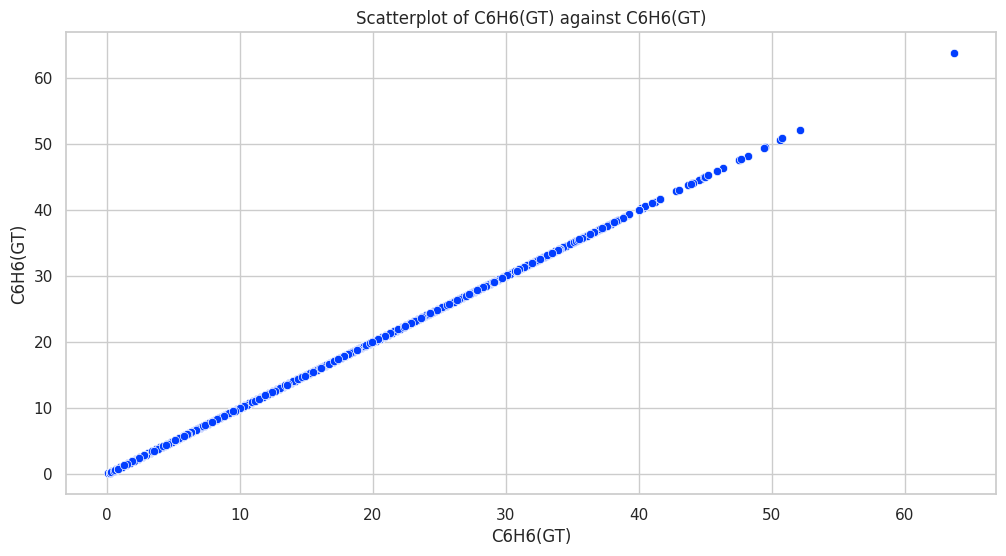

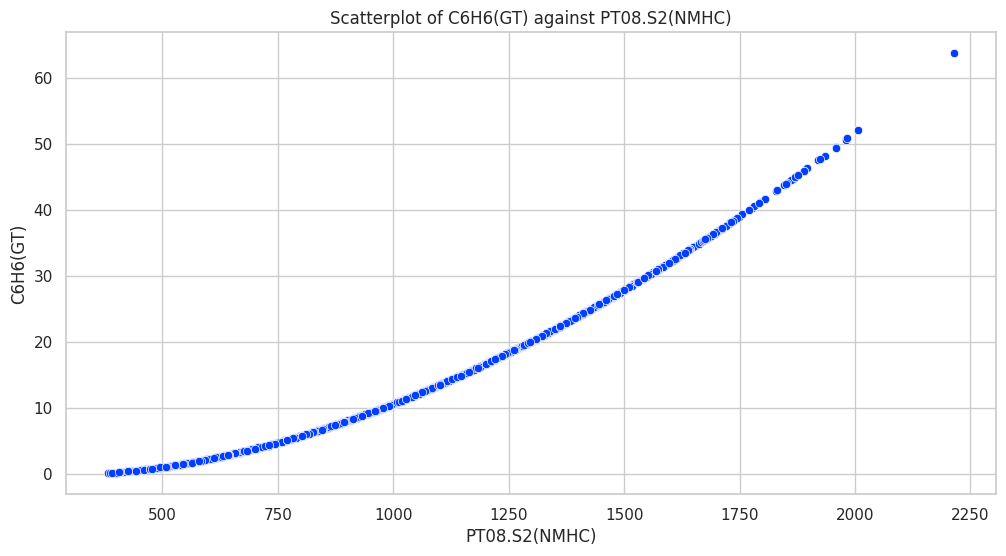

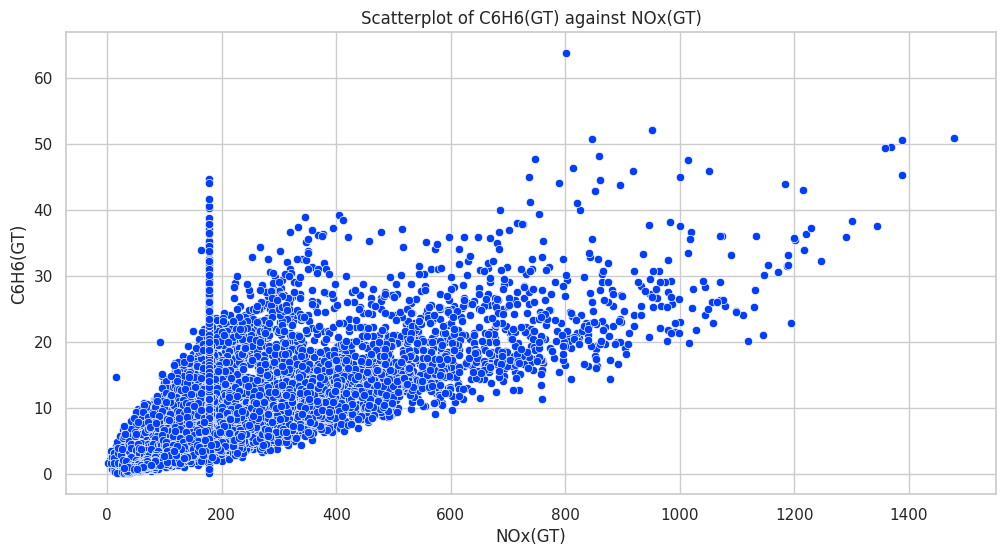

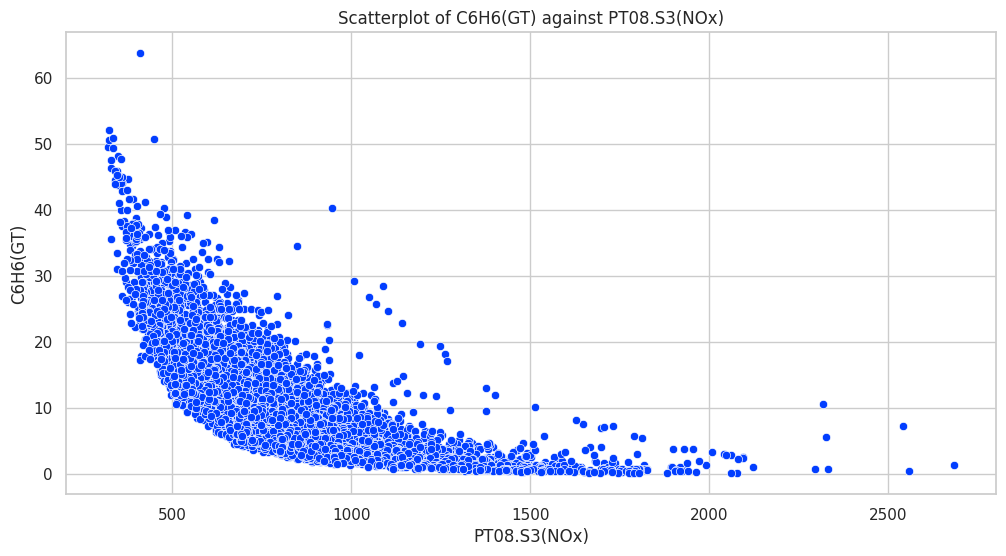

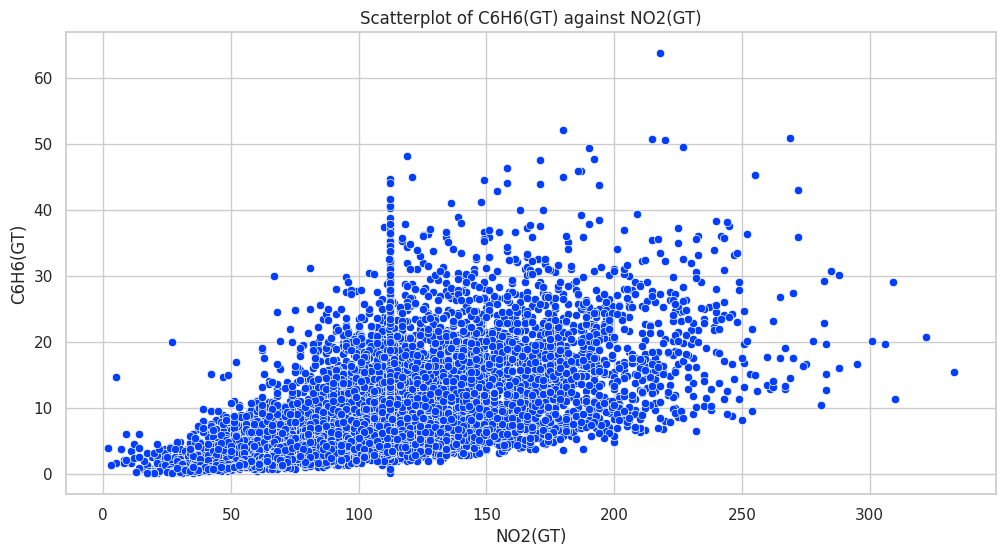

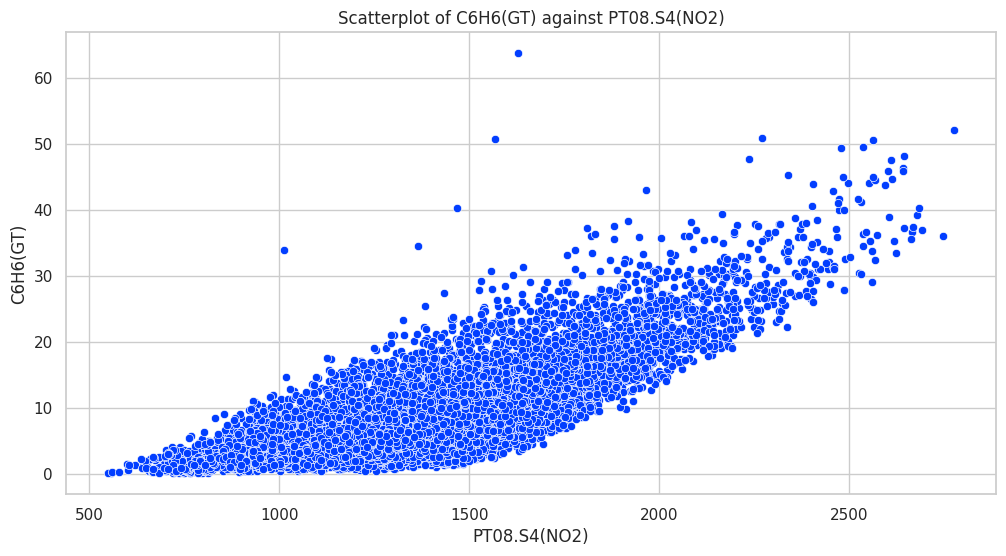

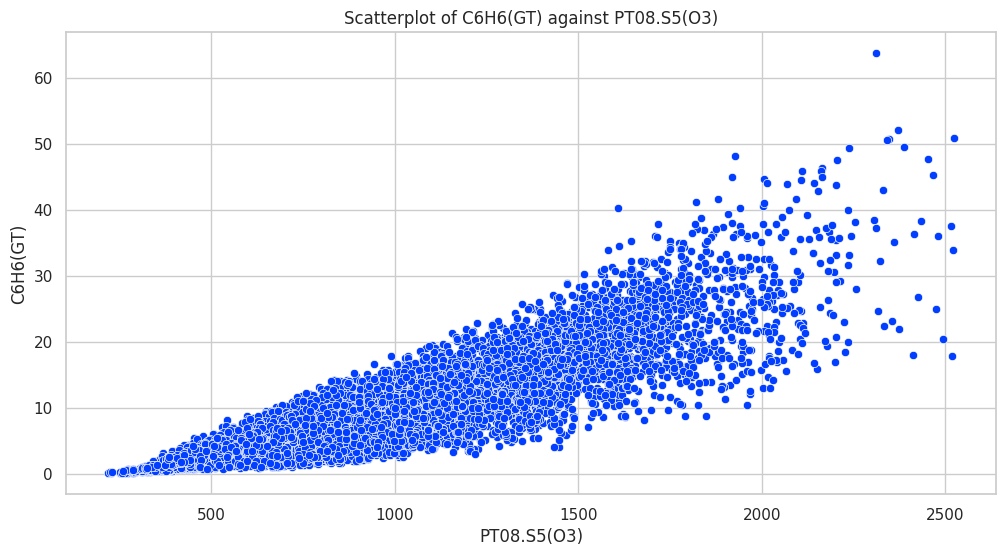

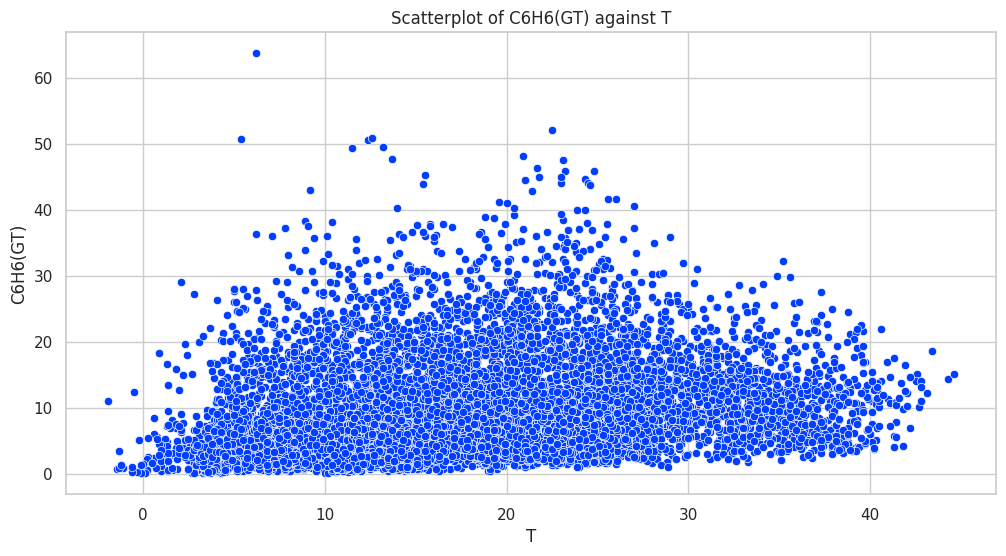

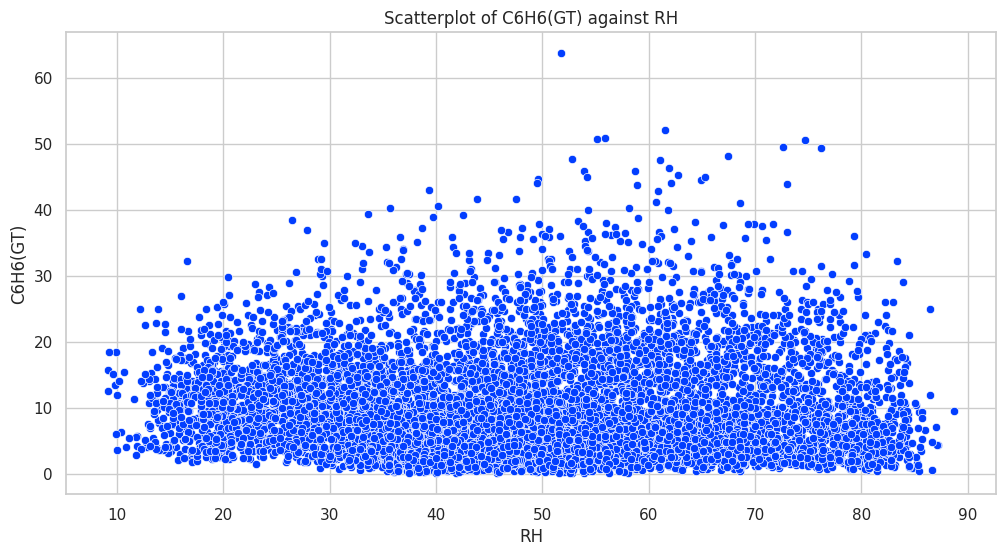

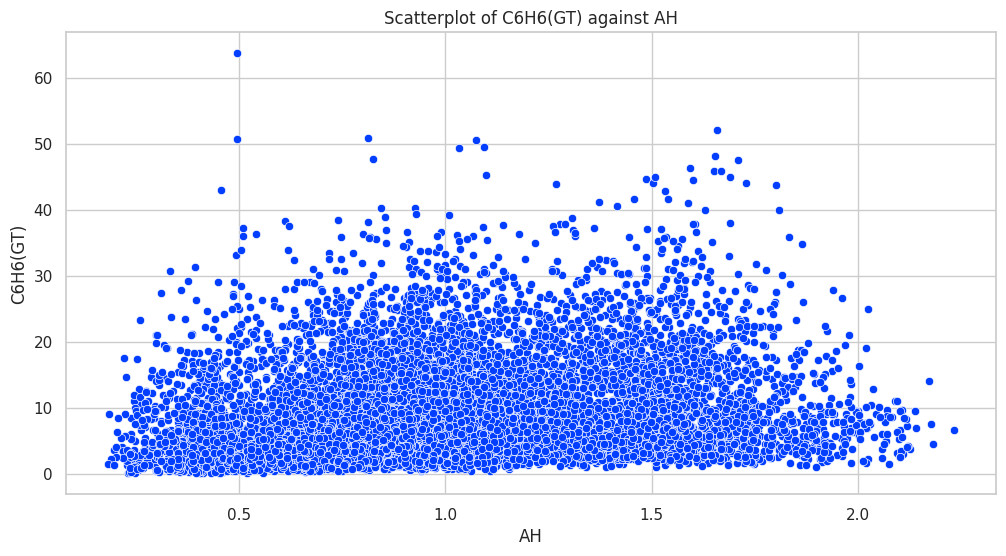

In [ ]:
columns_to_exclude = ['Weekday','Month', 'Time_numeric']
for column in df.columns:
    if column not in columns_to_exclude:
        plot_scatterplot(df, x_col=column)

From these graphs we can conclude that some of the data correlate quite strongly with C6H6. The more the arrangement of points resembles a straight line, the more strongly they correlate. These can include PT08.S2, PT08.S1, PT08.S3,PT08.S4,PT08.S5, CO(GT). The variant with correlation=1 can be observed on the graph of C6H6 to C6H6.

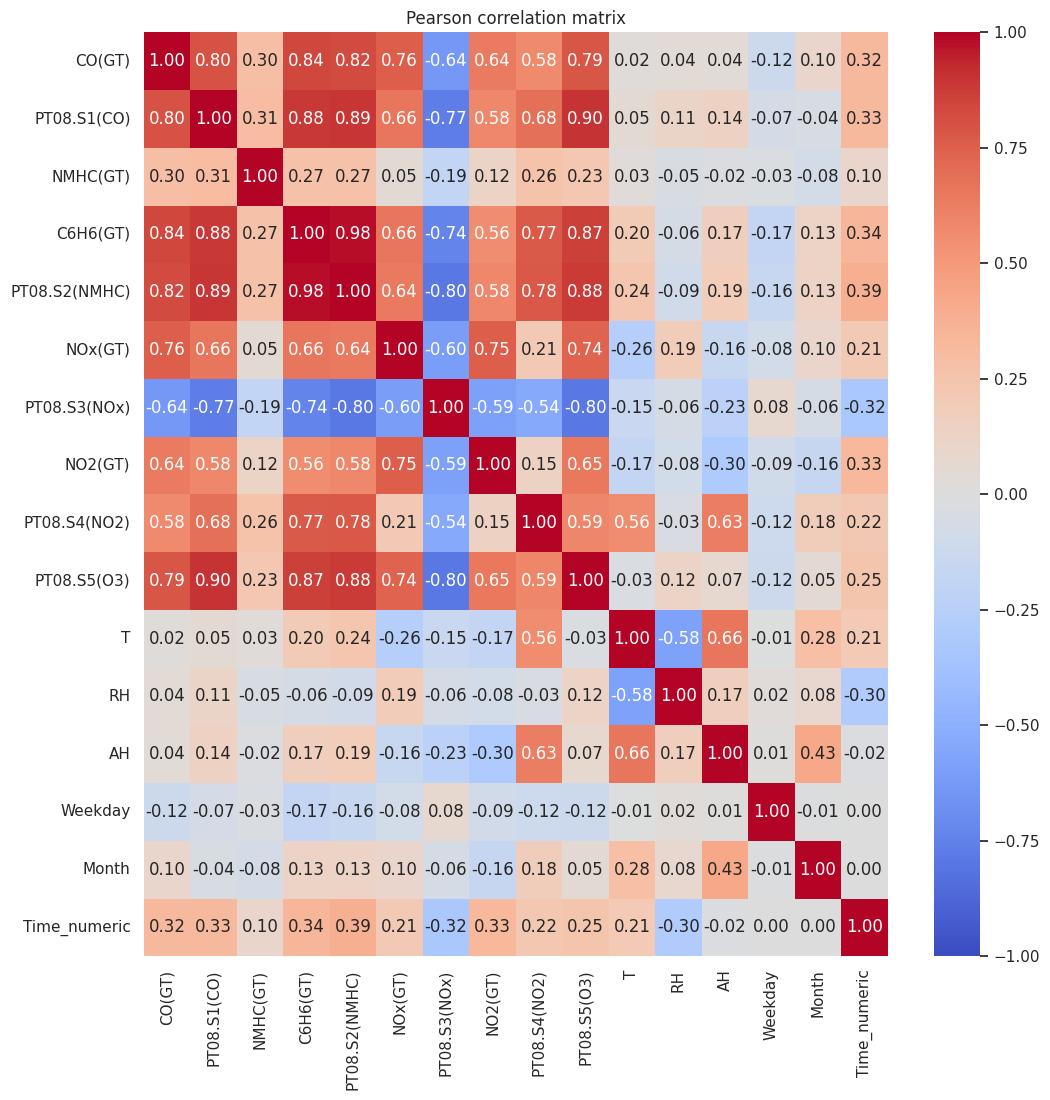

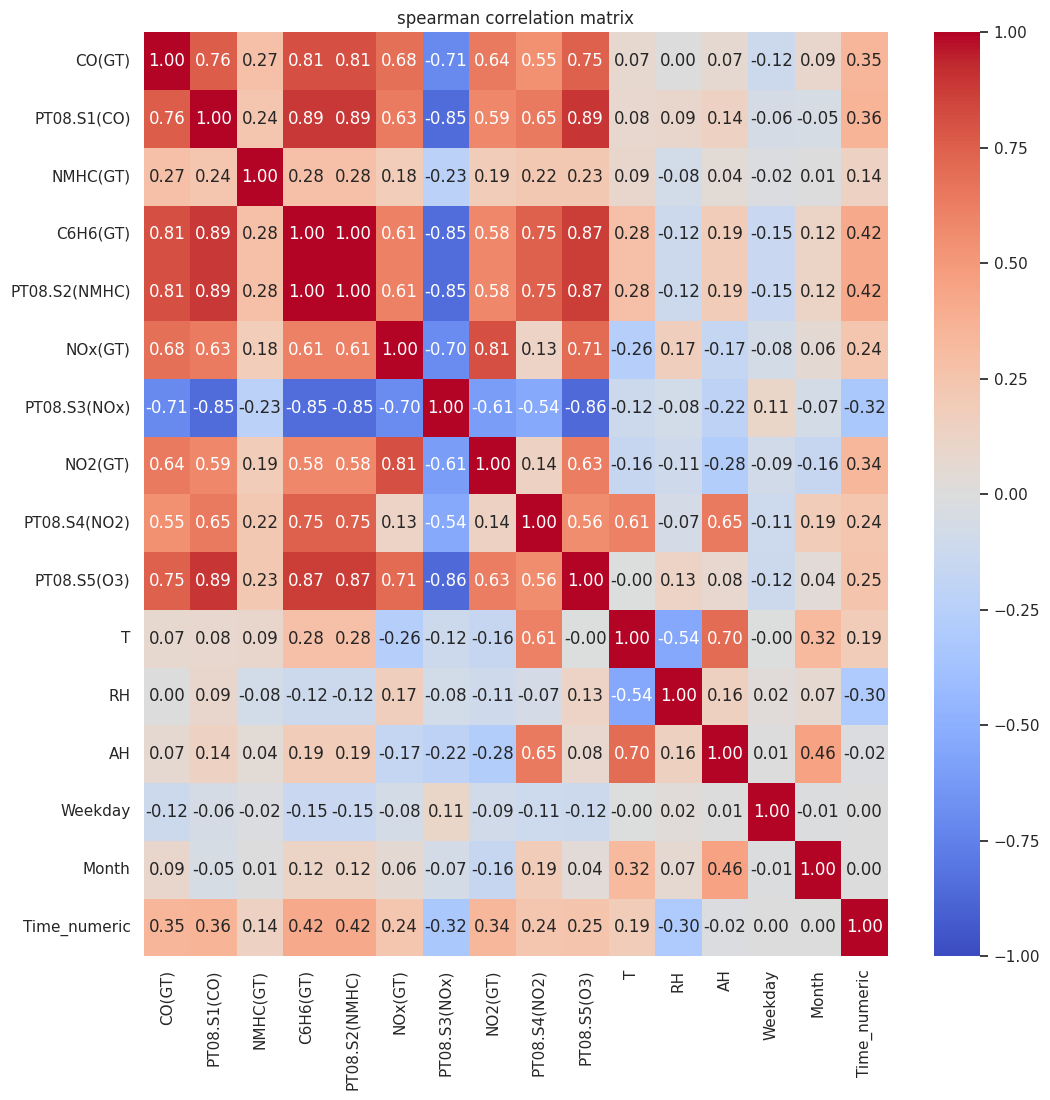

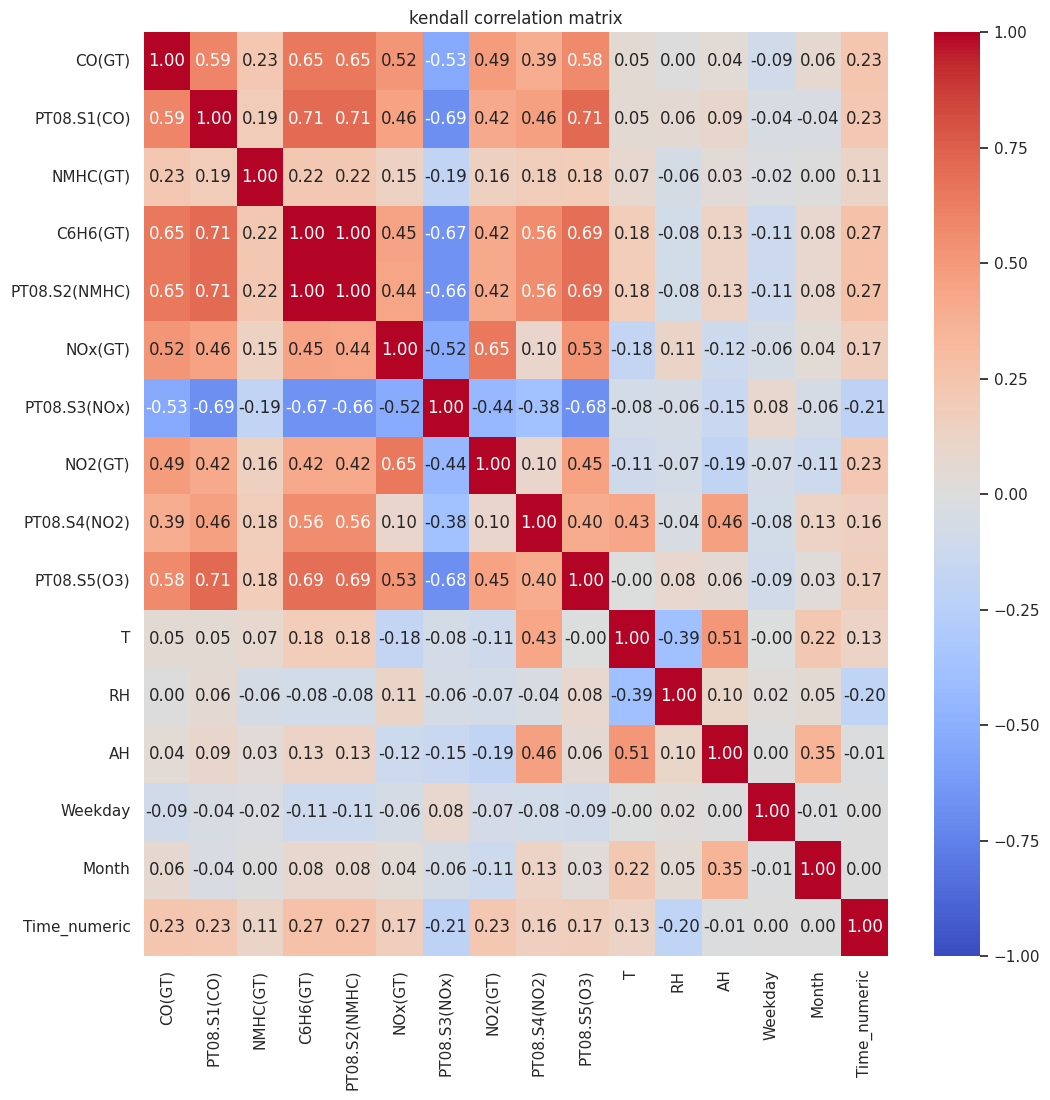

In [ ]:
subset=df.copy()
spearman_corr = subset.corr()
plt.figure(figsize=(12, 12))
sns.heatmap(spearman_corr, cmap="coolwarm", vmin=-1, vmax=1, annot=True, fmt=".2f")
plt.title("Pearson correlation matrix")
plt.show()

spearman_corr = subset.corr(method='spearman')
plt.figure(figsize=(12, 12))
sns.heatmap(spearman_corr, cmap="coolwarm", vmin=-1, vmax=1, annot=True, fmt=".2f")
plt.title("spearman correlation matrix")
plt.show()

spearman_corr = subset.corr(method='kendall')
plt.figure(figsize=(12, 12))
sns.heatmap(spearman_corr, cmap="coolwarm", vmin=-1, vmax=1, annot=True, fmt=".2f")
plt.title("kendall correlation matrix")
plt.show()

As we can see, columns like T,RH,AH, weekday, month, NMHC(GT) and Time have low correlation with our target value, so we can remove these columns from the table

In [ ]:
df=df.drop(['T'], axis=1)
df=df.drop(['RH'], axis=1)
df=df.drop(['AH'], axis=1)
df=df.drop(['NMHC(GT)'], axis=1)
df=df.drop(['Weekday'], axis=1)
df=df.drop(['Month'], axis=1)
df=df.drop(['Time_numeric'], axis=1)

In [ ]:
#sns.pairplot(df, corner=True, kind="kde")

So that is our heatmap now

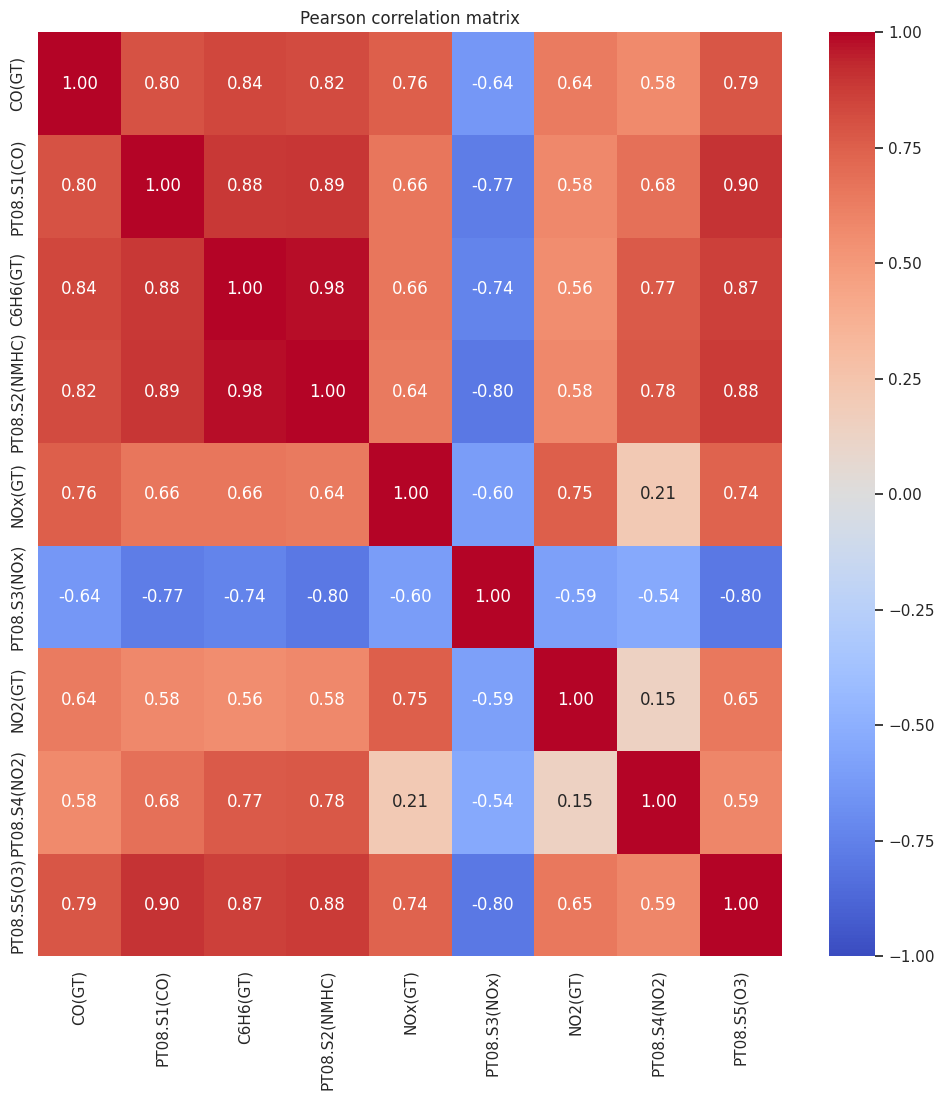

In [ ]:
subset = df.copy()
spearman_corr = subset.corr()
plt.figure(figsize=(12, 12))
sns.heatmap(spearman_corr, cmap="coolwarm", vmin=-1, vmax=1, annot=True, fmt=".2f")
plt.title("Pearson correlation matrix")
plt.show()

Here is the code to normalize columns

In [ ]:
def normalize_column(df):
    # Use RobustScaler to normalize the data
    scaler = RobustScaler()
    df = scaler.fit_transform(df)
    return df

In [ ]:
#normalizing columns
normalize_column(df)

array([[ 0.33592048,  1.01020408,  0.38541667, ...,  0.01818857,
         0.51230425,  0.56273063],
       [-0.09265095,  0.77891156,  0.125     , ..., -0.42861994,
         0.2147651 ,  0.01660517],
       [ 0.05020619,  1.15306122,  0.08333333, ...,  0.03946516,
         0.20581655,  0.20479705],
       ...,
       [ 0.19306334,  0.26870748,  0.4375    , ...,  1.3373375 ,
        -0.4966443 ,  0.23800738],
       [-0.02122238, -0.20408163,  0.13541667, ...,  0.93308219,
        -0.94407159, -0.35608856],
       [ 0.05020619,  0.02721088,  0.38541667, ...,  1.18840133,
        -0.74720358, -0.27121771]])

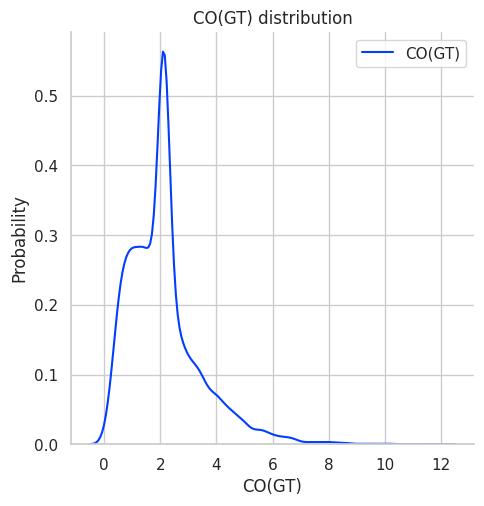

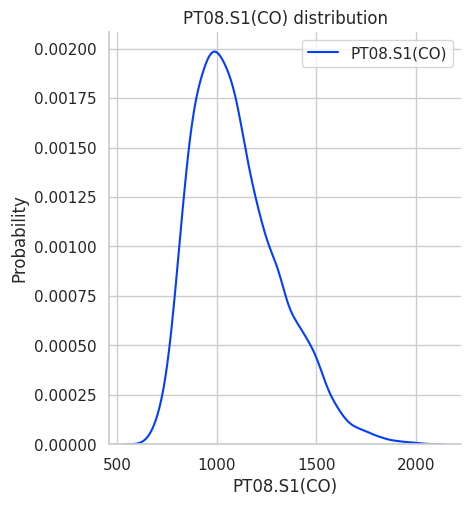

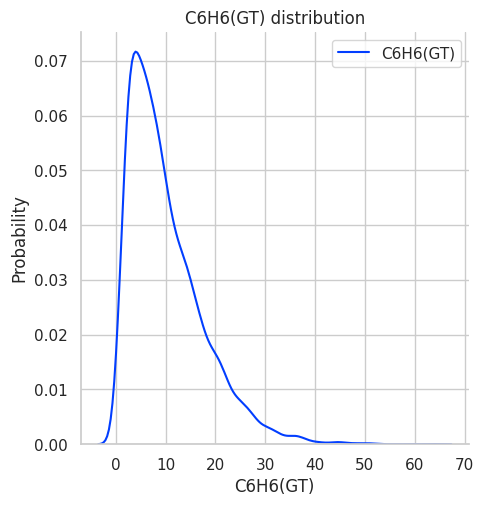

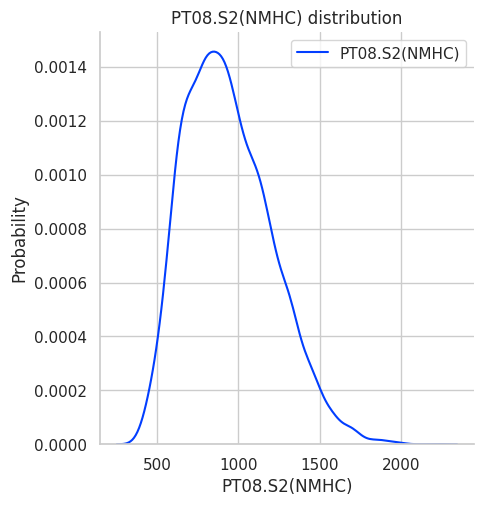

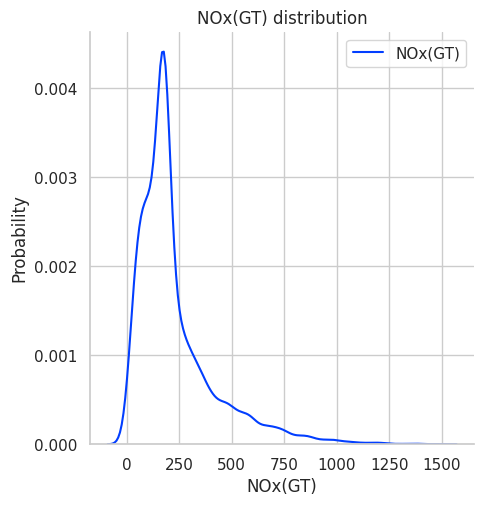

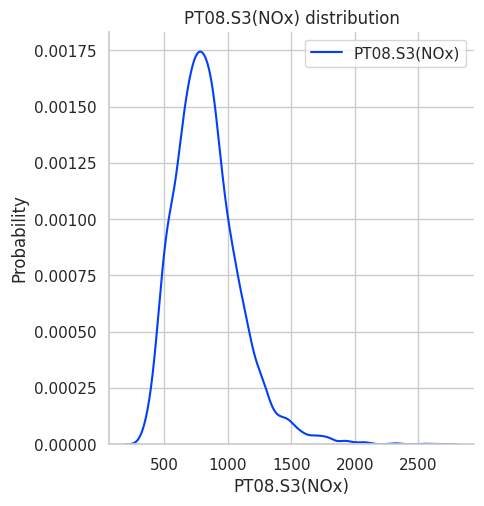

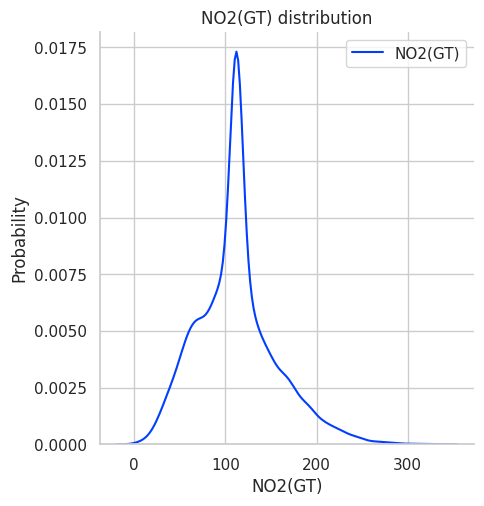

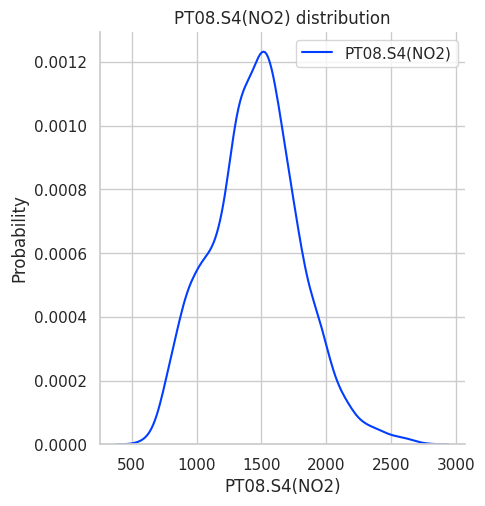

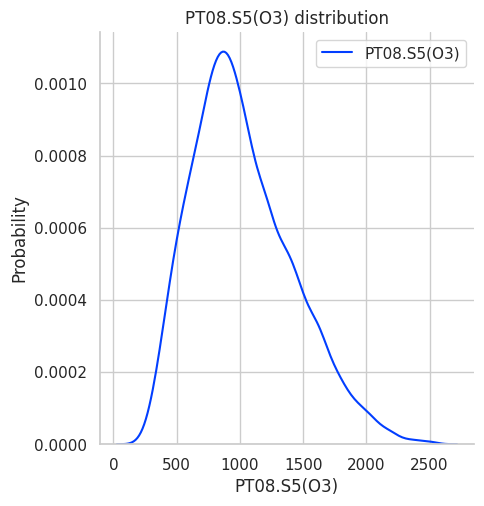

In [ ]:
for col in df.columns:
    plot_distribution(df, col, col, 'Probability', col+' distribution', legend_label=col)

Some data are shifted to the left and have a long tail. For such columns it makes sense to apply logarithmic transformation, because it just eliminates these "problems"

In [ ]:
'''for col in df.columns:
    df[col]=df[col]**2'''

df['CO(GT)'] = np.log1p(df['CO(GT)'])
df['C6H6(GT)'] = np.log1p(df['C6H6(GT)'])
df['PT08.S3(NOx)'] = np.log1p(df['PT08.S3(NOx)'])
df['NOx(GT)'] = np.log1p(df['NOx(GT)'])

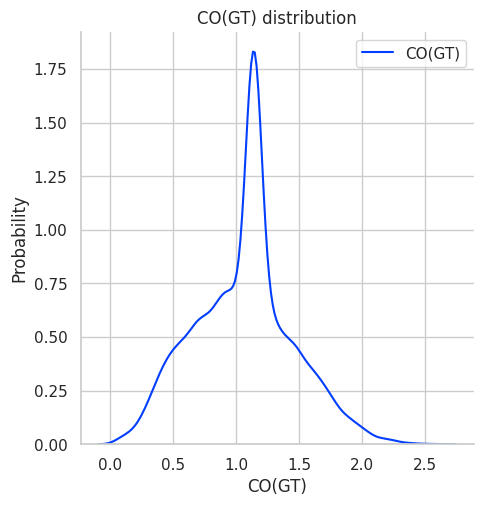

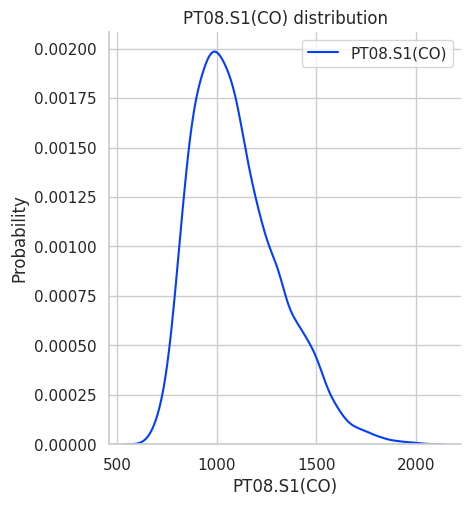

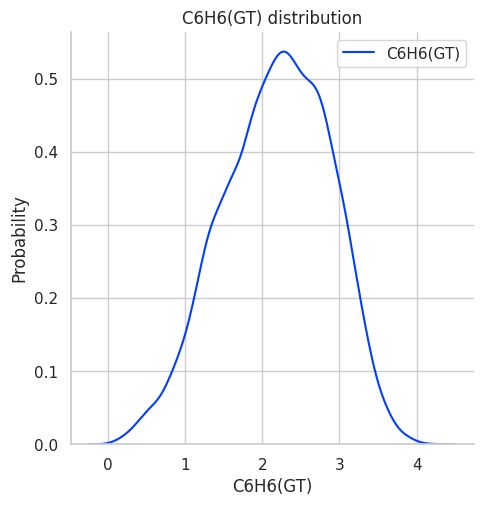

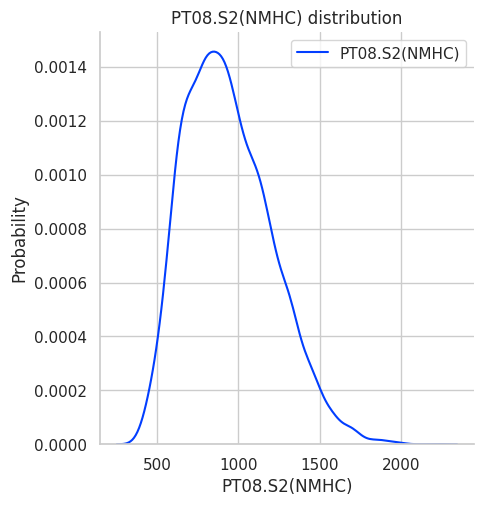

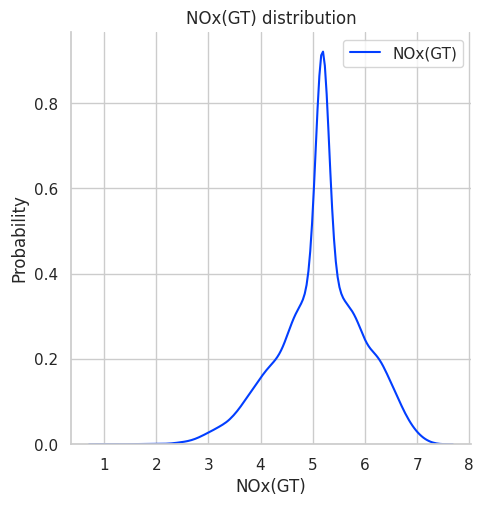

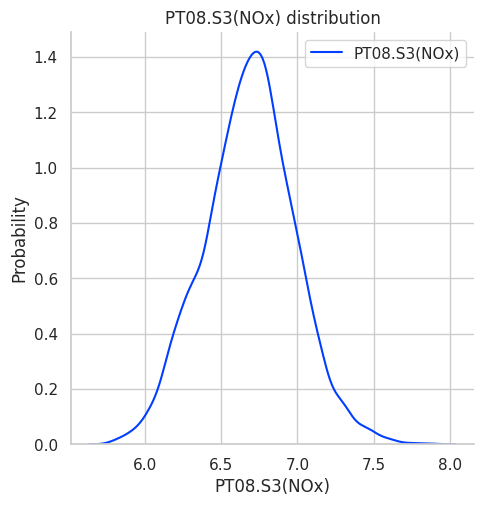

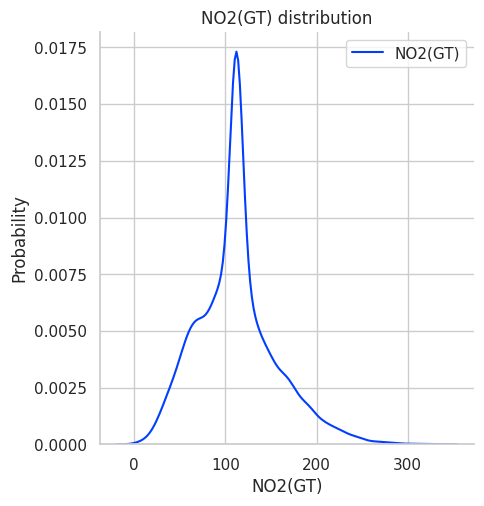

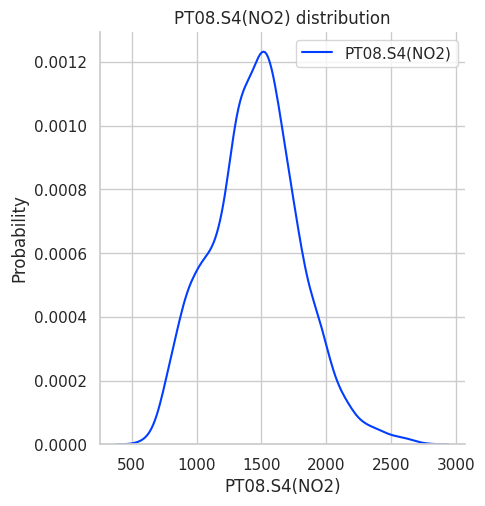

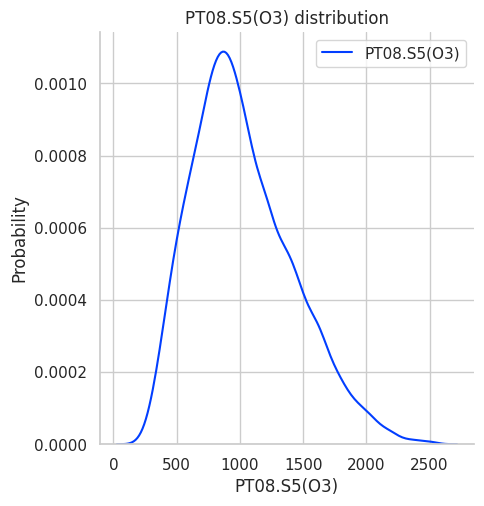

In [ ]:
for col in df.columns:
    plot_distribution(df, col, col, 'Probability', col+' distribution', legend_label=col)

Now our data is ready for modeling

# Modeling

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

# Features (excluding 'C6H6(GT)' which is the target variable)
X = df.drop('C6H6(GT)', axis=1)

# Target variable
y = df['C6H6(GT)']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a linear regression model
model = LinearRegression()
transformer=PolynomialFeatures()
X_tr2=transformer.fit_transform(X_train)
X_t2=transformer.transform(X_test)

# Fit the model on the training data
model.fit(X_tr2, y_train)

# Make predictions on the test data
y_pred = model.predict(X_t2)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse:.3f}')
mae = mean_absolute_error(y_test, y_pred)
print(f'Mean Absolute Error: {mae:.3f}')
r_squared = r2_score(y_test, y_pred)
print(f'R-squared: {r_squared:.3f}')

Mean Squared Error: 0.001
Mean Absolute Error: 0.024
R-squared: 0.998


In [ ]:
from sklearn.linear_model import RidgeCV
from sklearn.metrics import mean_absolute_error as mae

n_alphas = 2000
alphas = 10 ** np.linspace(-5,5, n_alphas)

ridge_model = RidgeCV(alphas=alphas, cv=6)

ridge_model.fit(X, y)

mae = mean_absolute_error(y, ridge_model.predict(X))
print("Mean Absolute Error: {:.3f}".format(mae))

mse = mean_squared_error(y, ridge_model.predict(X))
print('Mean Squared Error: {:.3f}'.format(mse))

r_squared = ridge_model.score(X, y)
print("R-squared Score: {:.3f}".format(r_squared))

selected_alpha = ridge_model.alpha_
print("Selected Alpha: {:.3f}".format(selected_alpha))

Mean Absolute Error: 0.105
Mean Squared Error: 0.019
R-squared Score: 0.959
Selected Alpha: 401.608


In [ ]:
from sklearn.linear_model import LassoCV
from sklearn.metrics import mean_absolute_error as mae

n_alphas = 2000
alphas = 10 ** np.linspace(-5, 10, n_alphas)

lasso_model = LassoCV(alphas=alphas, cv=5)

lasso_model.fit(X, y)

mae = mean_absolute_error(y, lasso_model.predict(X))
print("Mean Absolute Error: {:.3f}".format(mae))

mse = mean_squared_error(y, lasso_model.predict(X))
print("Mean Squared Error: {:.3f}".format(mse))

r_squared = lasso_model.score(X, y)
print("R-squared: {:.3f}".format(r_squared))

selected_alpha = lasso_model.alpha_
print("Selected Alpha: {:.3f}".format(selected_alpha))

Mean Absolute Error: 0.107
Mean Squared Error: 0.021
R-squared: 0.957
Selected Alpha: 0.272


As can be seen, linear regression without regularization gives better results than with regularization, although all variants show rather low error results (close to 0) and high R-squared results (close to 1)